In [1]:
import pandas as pd
import os

# Set the working directory
os.chdir('/Users/aligiritlioglu/Desktop/code')

# Load the CSV file
file_path = 'Cleaned_Gender_Experiments_Full.csv'
df = pd.read_csv(file_path)

# Drop rows 1 to 27 (0-based indexing means rows 1-27 correspond to index 0-26)
df = df.drop(index=range(0, 27))

# Drop columns A-Q (first 17 columns, 0-based indexing)
df = df.drop(df.columns[:17], axis=1)

# Define the questions and their corresponding DOs for long-term and short-term
long_term_questions = ['Q14', 'Q31', 'Q15', 'Q34', 'Q26']
long_term_dos = ['Q14_DO', 'Q31_DO', 'Q15_DO', 'Q34_DO', 'Q26_DO']

short_term_questions = ['Q16', 'Q32', 'Q17', 'Q33', 'Q27']
short_term_dos = ['Q16_DO', 'Q32_DO', 'Q17_DO', 'Q33_DO', 'Q27_DO']

# Check which data points have non-null values for long-term questions or DOs
df['Long_Term_Asked'] = df[long_term_questions + long_term_dos].notna().any(axis=1)

# Check which data points have non-null values for short-term questions or DOs
df['Short_Term_Asked'] = df[short_term_questions + short_term_dos].notna().any(axis=1)

# Create new columns for Short-Term and Long-Term Attractiveness by concatenating relevant questions and DOs
df['Long_Term_Attractiveness'] = df[long_term_questions + long_term_dos].apply(
    lambda row: ' '.join(row.dropna().astype(str)), axis=1)

df['Short_Term_Attractiveness'] = df[short_term_questions + short_term_dos].apply(
    lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Merge Long-Term and Short-Term Attractiveness into Attractiveness_DO
df['Attractiveness_DO'] = df['Long_Term_Attractiveness'].replace('', pd.NA).fillna(df['Short_Term_Attractiveness']).replace(pd.NA, '')

# Drop the Long_Term_Attractiveness and Short_Term_Attractiveness columns
df.drop(columns=['Long_Term_Attractiveness', 'Short_Term_Attractiveness'], inplace=True)

# Drop the original question and DO columns for both short-term and long-term
df.drop(columns=long_term_questions + long_term_dos + short_term_questions + short_term_dos, inplace=True)

# Remove all columns with NaN values
df.dropna(axis=1, inplace=True)

# Save the cleaned DataFrame to a new CSV file
output_file_path = 'Cleaned_Gender_Experiments.csv'
df.to_csv(output_file_path, index=False)

In [2]:
data = df

In [3]:
import pandas as pd

# Load the dataset
file_path = 'Cleaned_Gender_Experiments_Full.csv'
data = pd.read_csv(file_path)

# Convert all column names to uppercase to ensure case insensitivity
data.columns = data.columns.str.upper()

# Remove metadata rows by dropping rows with NaN values in key columns (e.g., Q7, Q8, Q5, Q35)
# Adjust the columns based on your dataset to identify non-participant rows accurately
data_cleaned = data.dropna(subset=['Q7', 'Q8', 'Q5', 'Q35'])

# Print the number of participants
num_participants = len(data_cleaned)
print(f"Number of participants: {num_participants}")

# Gender demographics using the 'Q7' column
gender_encoding = {'Female': 0, 'Male': 1}
if 'Q7' in data_cleaned.columns:
    gender_distribution = data_cleaned['Q7'].map(gender_encoding).value_counts(normalize=True) * 100
    print("\nGender Distribution (%):\n", gender_distribution)
else:
    print("\nColumn 'Q7' not found in the dataset.")

# Age demographics using the 'Q8' column
if 'Q8' in data_cleaned.columns:
    # Convert 'Q8' to numeric values
    data_cleaned['Q8'] = pd.to_numeric(data_cleaned['Q8'], errors='coerce')
    
    # Define age brackets
    age_bins = [18, 25, 35, 45, 55, 65, 75, 100]
    age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

    # Apply the cut function to create age brackets
    data_cleaned['AGE_BRACKET'] = pd.cut(data_cleaned['Q8'], bins=age_bins, labels=age_labels, right=False)

    # Display the distribution of age groups
    age_distribution = data_cleaned['AGE_BRACKET'].value_counts(normalize=True) * 100
    print("\nAge Group Distribution (%):\n", age_distribution)
else:
    print("\nColumn 'Q8' not found in the dataset.")

# Income demographics using the 'Q5' column
if 'Q5' in data_cleaned.columns:
    income_mapping = {
        'Less than £30,000': 1,
        '£30,000 to £60,000': 2,
        '£60,001 to £90,000': 3,
        '£90,001 to £120,000': 4,
        'More than £120,000': 5
    }
    income_distribution = data_cleaned['Q5'].map(income_mapping).value_counts(normalize=True) * 100
    print("\nIncome Level Distribution (%):\n", income_distribution)
else:
    print("\nColumn 'Q5' not found in the dataset.")

# Education demographics using the 'Q35' column
if 'Q35' in data_cleaned.columns:
    # Remove unwanted rows from the education data
    valid_education_levels = ['Undergraduate Degree', 'A-Levels or equivalent', 
                              'GCSEs or equivalent', 'Postgraduate Degree']
    education_distribution = data_cleaned['Q35'][data_cleaned['Q35'].isin(valid_education_levels)] \
                                .value_counts(normalize=True) * 100
    print("\nEducation Level Distribution (%):\n", education_distribution)
else:
    print("\nColumn 'Q35' not found in the dataset.")

Number of participants: 363

Gender Distribution (%):
 Q7
0    51.790634
1    48.209366
Name: proportion, dtype: float64

Age Group Distribution (%):
 AGE_BRACKET
55-64    26.721763
35-44    17.079890
25-34    16.528926
45-54    16.253444
18-24    11.570248
65-74    10.468320
75+       1.377410
Name: proportion, dtype: float64

Income Level Distribution (%):
 Q5
1    36.914601
2    34.435262
3    19.008264
4     7.162534
5     2.479339
Name: proportion, dtype: float64

Education Level Distribution (%):
 Q35
Undergraduate Degree      40.220386
A-Levels or equivalent    24.793388
Postgraduate Degree       17.906336
GCSEs or equivalent       17.079890
Name: proportion, dtype: float64


/var/folders/kq/bvkxmyh97t11vs9bjbzd83mm0000gn/T/ipykernel_6784/3126649154.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Q8'] = pd.to_numeric(data_cleaned['Q8'], errors='coerce')
/var/folders/kq/bvkxmyh97t11vs9bjbzd83mm0000gn/T/ipykernel_6784/3126649154.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['AGE_BRACKET'] = pd.cut(data_cleaned['Q8'], bins=age_bins, labels=age_labels, right=False)


Initial data shape: (366, 58)
Columns in the DataFrame:
['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q1', 'Q5', 'Q35', 'Q7', 'Q8', 'Q3', 'Q3_DO', 'Q10', 'Q11', 'Q12', 'Q18', 'Q14', 'Q14_DO', 'Q31', 'Q31_DO', 'Q15', 'Q15_DO', 'Q34', 'Q34_DO', 'Q26', 'Q26_DO', 'Q16', 'Q16_DO', 'Q32', 'Q32_DO', 'Q17', 'Q17_DO', 'Q33', 'Q33_DO', 'Q27', 'Q27_DO', 'Q25', 'Q22', 'Q22_DO', 'Q23', 'Block3_DO', 'Long_Term_Asked', 'Short_Term_Asked', 'Long_Term_Attractiveness', 'Short_Term_Attractiveness', 'Attractiveness_DO']

Robust Regression Results:
                    Robust linear Model Regression Results                    
Dep. Variable:        combined_rating   No. Observations:                  362
Model:                            RLM   Df Residuals:           

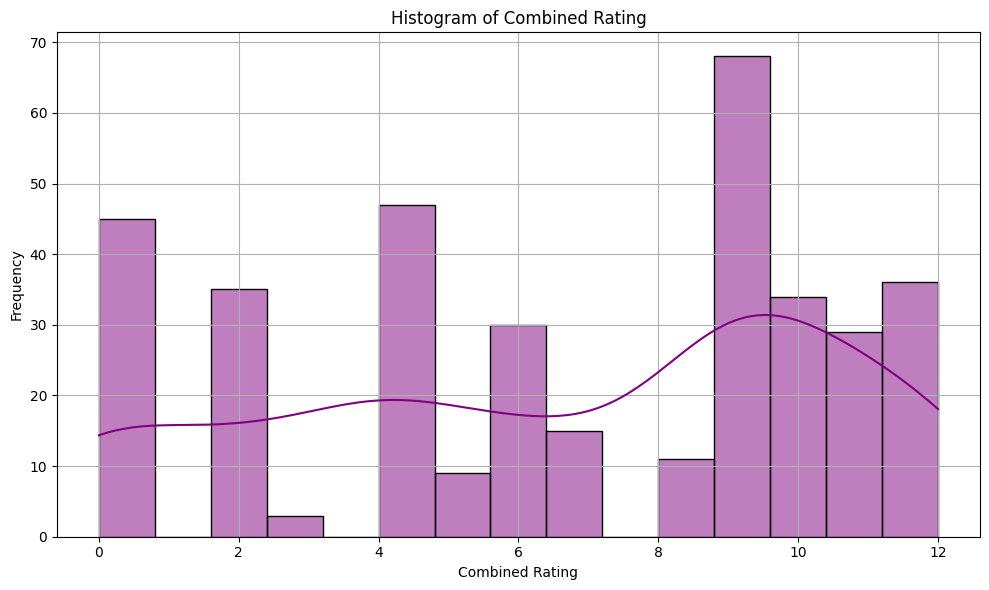

/var/folders/kq/bvkxmyh97t11vs9bjbzd83mm0000gn/T/ipykernel_6784/2747700425.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/var/folders/kq/bvkxmyh97t11vs9bjbzd83mm0000gn/T/ipykernel_6784/2747700425.py:196: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=12)


<Figure size 800x600 with 0 Axes>

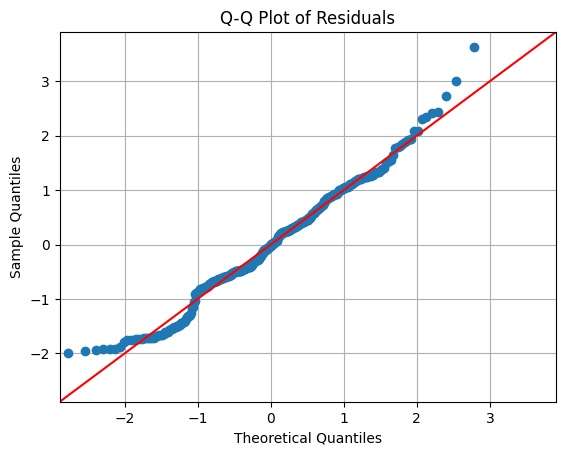

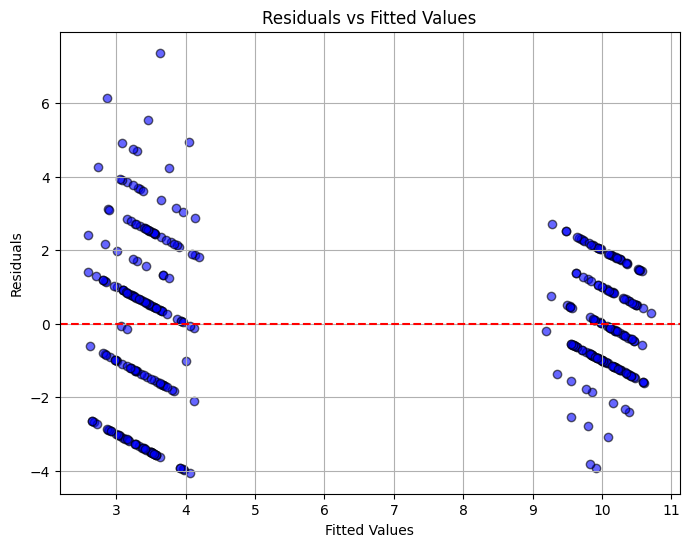

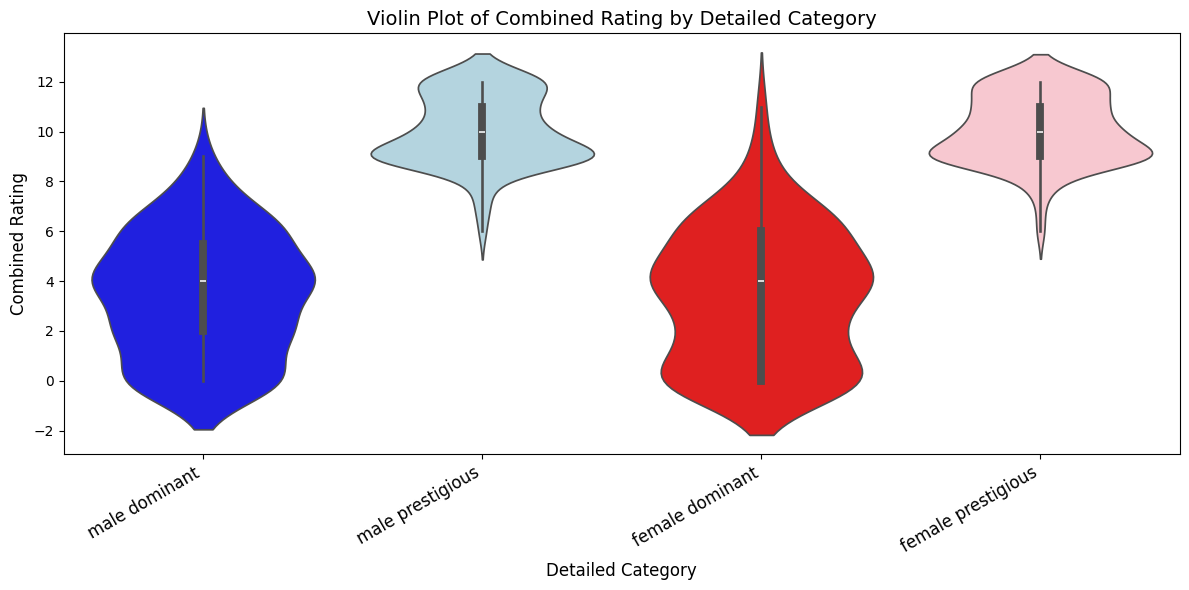

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset (adjust the file path as needed)
data = pd.read_csv('Cleaned_Gender_Experiments_Full.csv')  # Replace 'gender.csv' with the correct file path

# Display initial data shape and columns
print("Initial data shape:", data.shape)
print("Columns in the DataFrame:")
print(data.columns.tolist())

# Standardize column names (remove leading/trailing spaces and convert to lower case)
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
data.columns = data.columns.str.lower()  # Convert to lower case for consistency

# Check if 'q10', 'q11', and 'q12' exist after standardization
expected_columns = ['q10', 'q11', 'q12']
missing_columns = [col for col in expected_columns if col not in data.columns]
if missing_columns:
    print(f"\nWarning: The following columns are missing from the DataFrame: {missing_columns}")
else:
    # If all columns are found, proceed with your logic

    # Strip and lower the strings in 'q10', 'q11', and 'q12' to ensure consistency
    data['q10'] = data['q10'].str.strip().str.lower()
    data['q11'] = data['q11'].str.strip().str.lower()
    data['q12'] = data['q12'].str.strip().str.lower()

    # Updated outcome mapping for responses
    outcome_mapping = {
        "not effective at all": 0,
        "somewhat effective": 1,
        "relatively ineffective": 2,
        "effective": 3,
        "very effective": 4,
        "extremely effective": 5,
        "not at all trustworthy": 0,
        "somewhat trustworthy": 1,
        "relatively untrustworthy": 2,
        "trustworthy": 3,
        "very trustworthy": 4,
        "extremely trustworthy": 5,
        "not at all willing": 0,
        "somewhat willing": 1,
        "relatively unwilling": 2,
        "willing": 3,
        "very willing": 4,
        "extremely willing": 5,
        "unknown": np.nan  # Handle unknown values gracefully
    }

    # Map outcomes to numerical values
    data['effectiveness_numeric'] = data['q10'].map(outcome_mapping)
    data['trustworthiness_numeric'] = data['q11'].map(outcome_mapping)
    data['willingness_numeric'] = data['q12'].map(outcome_mapping)

    # Create a combined rating by summing effectiveness, trustworthiness, and willingness
    data['combined_rating'] = (
        data['effectiveness_numeric'] +
        data['trustworthiness_numeric'] +
        data['willingness_numeric']
    )

    # Encode gender (Q7)
    gender_encoding = {'female': 0, 'male': 1}
    data['gender_encoded'] = data['q7'].str.strip().str.lower().map(gender_encoding)

    # Rename 'q8' to 'age'
    data = data.rename(columns={'q8': 'age'})

    # Define a mapping for income brackets to numerical values (Q5)
    income_mapping = {
        'less than £30,000': 1,
        '£30,000 to £60,000': 2,
        '£60,001 to £90,000': 3,
        '£90,001 to £120,000': 4,
        'more than £120,000': 5
    }

    # Encode income numerically
    data['income_numeric'] = data['q5'].str.strip().str.lower().map(income_mapping)

    # Define a mapping for the education levels (Q35)
    education_mapping = {
        'gcses or equivalent': 1,
        'a-levels or equivalent': 2,
        'undergraduate degree': 3,
        'postgraduate degree': 4
    }

    # Encode education numerically
    data['education_numeric'] = data['q35'].str.strip().str.lower().map(education_mapping)

    # Define a function to encode q3_do into four categories, handling NaN values
    def encode_detailed_q3_do(description):
        if isinstance(description, float) and np.isnan(description):
            return 'unknown'
        if 'michael' in description.lower():
            return 'male dominant'
        elif 'michelle' in description.lower():
            return 'female dominant'
        elif 'james' in description.lower():
            return 'male prestigious'
        elif 'jasmine' in description.lower():
            return 'female prestigious'
        else:
            return 'unknown'

    # Apply the encoding function to create a new column
    data['detailed_category'] = data['q3_do'].apply(encode_detailed_q3_do)

    # Create a copy of the 'detailed_category' column for plotting
    detailed_category_copy = data['detailed_category']

    # Convert the detailed categories into dummy variables (do not drop the first category)
    data = pd.get_dummies(data, columns=['detailed_category'], drop_first=False)

    # Ensure all relevant columns are numeric
    numeric_columns = ['age', 'gender_encoded', 'combined_rating', 'income_numeric', 'education_numeric']
    data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with missing values for the relevant variables
    data = data.dropna(subset=numeric_columns)

    # Create stooge_gender and stooge_style based on the categorical encodings
    data['stooge_gender'] = np.where((data['detailed_category_female dominant'] + data['detailed_category_female prestigious']) > 0, 1, 0)
    data['stooge_style'] = np.where((data['detailed_category_female dominant'] + data['detailed_category_male dominant']) > 0, 1, 0)

    # Define independent variables
    X = data[['age', 'income_numeric', 'gender_encoded', 'stooge_gender', 'stooge_style', 'education_numeric']]

    # Add interaction terms for gender * stooge_gender * stooge_style using .loc to avoid SettingWithCopyWarning
    X = X.copy()
    X.loc[:, 'gender_stoogegender'] = X['gender_encoded'] * X['stooge_gender']
    X.loc[:, 'gender_stoogestyle'] = X['gender_encoded'] * X['stooge_style']
    X.loc[:, 'stoogegender_stoogestyle'] = X['stooge_gender'] * X['stooge_style']
    X.loc[:, 'gender_stoogegender_stoogestyle'] = X['gender_encoded'] * X['stooge_gender'] * X['stooge_style']

    # Add constant for intercept
    X = sm.add_constant(X)

    # Define dependent variable
    y = data['combined_rating']

    # Fit robust regression model
    model = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()

    # Display summary of the regression
    print("\nRobust Regression Results:")
    print(model.summary())

    # Visualization

    # 1. Histogram of Combined Rating
    plt.figure(figsize=(10, 6))
    sns.histplot(y, bins=15, kde=True, color='purple')
    plt.title('Histogram of Combined Rating')
    plt.xlabel('Combined Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('hist_combined_rating.png')
    plt.show()

    # 2. Save Q-Q plot for residuals
    plt.figure(figsize=(8, 6))
    sm.qqplot(model.resid, line='45', fit=True)
    plt.title('Q-Q Plot of Residuals')
    plt.grid(True)
    plt.savefig('qqplot_residuals.png')

    # 3. Save Residuals vs Fitted Values plot
    plt.figure(figsize=(8, 6))
    plt.scatter(model.fittedvalues, model.resid, color='blue', edgecolor='k', alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.savefig('residuals_vs_fitted.png')

    # 4. Violin plot for Combined Rating by Detailed Category using the copy
    plt.figure(figsize=(12, 6))  # Increase figure size
    ax = sns.violinplot(
        x=detailed_category_copy,
        y='combined_rating',
        data=data,
        palette=['blue', 'lightblue', 'red', 'pink'],  # Custom colors
        order=['male dominant', 'male prestigious', 'female dominant', 'female prestigious']
    )
    
    # Adjust x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=12)
    
    # Set title and labels
    plt.title('Violin Plot of Combined Rating by Detailed Category', fontsize=14)
    plt.xlabel('Detailed Category', fontsize=12)
    plt.ylabel('Combined Rating', fontsize=12)
    
    # Ensure labels are not cut off
    plt.tight_layout()
    
    # Save and show the plot
    plt.savefig('violin_combined_rating_by_category.png', dpi=300)
    plt.show()

Male-Attracted Participants CLM Regression Results
                              Coefficient  CI Lower  CI Upper  P-value
Gender_Encoded                   0.458015 -0.354406  1.211737    0.276
Income_Numeric                  -0.000010 -0.000014  0.000015    0.930
Education_Numeric                0.685996  0.343882  1.195388    0.000
Long_Short_Term                  0.510695 -0.398454  1.389920    0.236
Sexual_Orientation_Encoded       0.613143 -0.009293  1.264870    0.054
Stooge_Style_Encoded            -2.404406 -3.168679 -1.530697    0.000
Stooge_LongShort_Interaction    -0.977819 -2.019225  0.009454    0.052
Stooge_Education_Interaction    -0.740740 -1.301079 -0.453562    0.000

Female-Attracted Participants CLM Regression Results
                              Coefficient  CI Lower  CI Upper  P-value
Gender_Encoded                   0.725311 -0.049817  1.541348    0.062
Income_Numeric                   0.000017 -0.000014  0.000013    0.964
Education_Numeric                0.445551 -

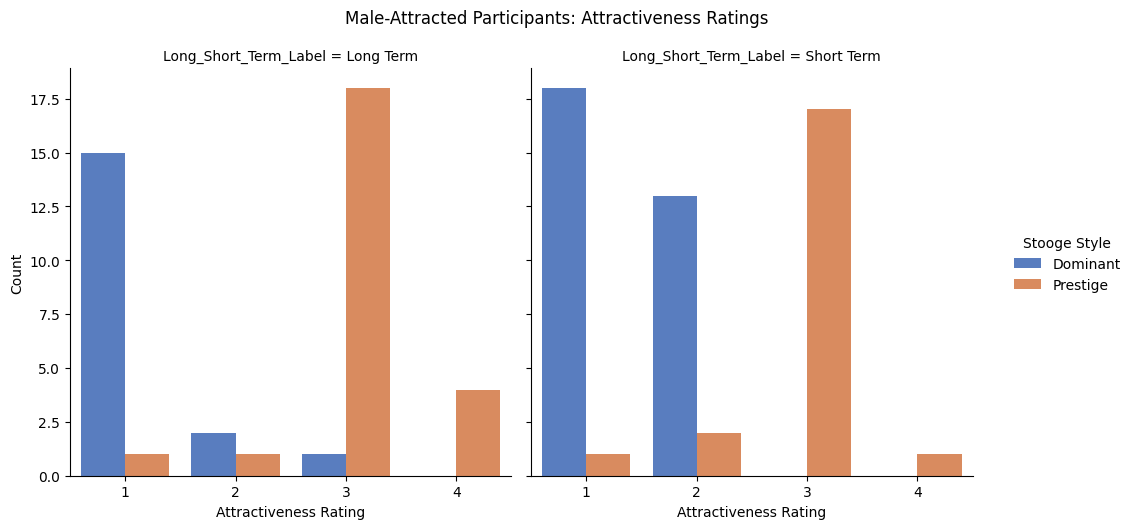

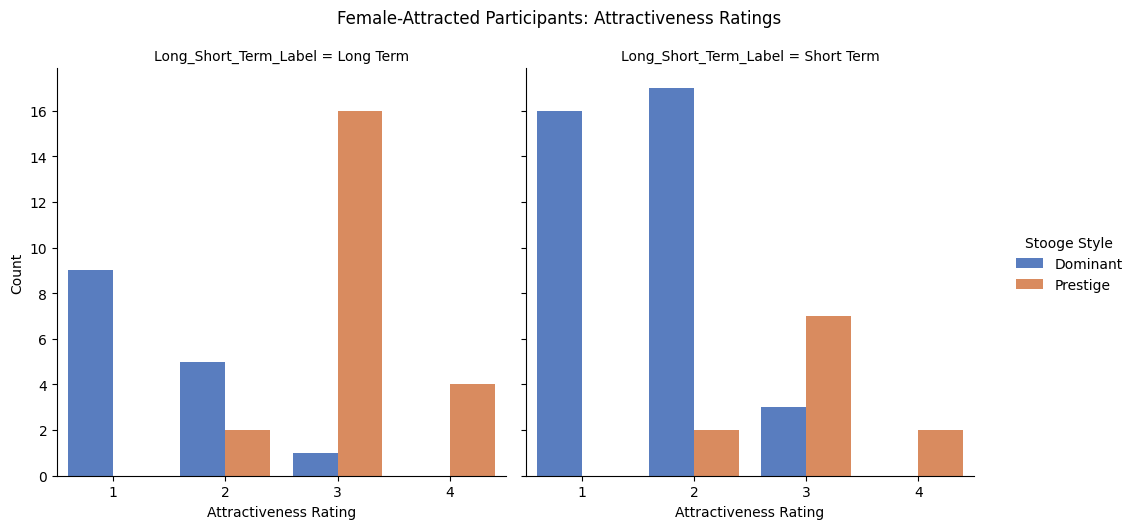

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mord import LogisticAT
from sklearn.utils import resample

# ------------------------------------------------------------------------------
# Reference Categories and Encodings:
# ------------------------------------------------------------------------------
# Gender_Encoded: 0 = Female, 1 = Male
# Income_Numeric: 1 = Less than £30,000
#                 2 = £30,000 - £59,999
#                 3 = £60,000 - £89,999
#                 4 = £90,000 - £119,999
#                 5 = £120,000 or more
# Education_Numeric: 1 = GCSEs or equivalent
#                    2 = A-Levels or equivalent
#                    3 = Undergraduate Degree
#                    4 = Postgraduate Degree
# Long_Short_Term: 0 = Short Term, 1 = Long Term
# Sexual_Orientation_Encoded: 0 = Homosexual, 1 = Heterosexual, 2 = Bisexual
# Stooge_Style_Encoded: 0 = Prestige, 1 = Dominant
#
# Q25_Numeric_Mapped = Ordinal attractiveness rating:
#  1 = "Not at all attractive"
#  2 = "Relatively unattractive"
#  3 = "Attractive"
#  4 = "Very attractive"
# ------------------------------------------------------------------------------

# Load the dataset
df = pd.read_csv('Cleaned_Gender_Experiments_Full.csv')

# Define the questions and their corresponding DOs for long-term and short-term
long_term_questions = ['Q14', 'Q31', 'Q15', 'Q34', 'Q26']
long_term_dos = ['Q14_DO', 'Q31_DO', 'Q15_DO', 'Q34_DO', 'Q26_DO']

short_term_questions = ['Q16', 'Q32', 'Q17', 'Q33', 'Q27']
short_term_dos = ['Q16_DO', 'Q32_DO', 'Q17_DO', 'Q33_DO', 'Q27_DO']

# Check which data points have non-null values for long-term questions or DOs
df['Long_Term_Asked'] = df[long_term_questions + long_term_dos].notna().any(axis=1)

# Check which data points have non-null values for short-term questions or DOs
df['Short_Term_Asked'] = df[short_term_questions + short_term_dos].notna().any(axis=1)

# Create the 'Long_Short_Term' column (0=short, 1=long)
df['Long_Short_Term'] = np.nan
df.loc[df['Long_Term_Asked'], 'Long_Short_Term'] = 1
df.loc[df['Short_Term_Asked'] & ~df['Long_Term_Asked'], 'Long_Short_Term'] = 0

# Drop rows where 'Long_Short_Term' could not be determined
df = df.dropna(subset=['Long_Short_Term'])

# Define a mapping for the categorical 'Q25' responses to integer values
q25_mapping = {
    "Not at all attractive": 1,
    "Relatively unattractive": 2,
    "Attractive": 3,
    "Very attractive": 4
}

# Apply this mapping to create a new column for 'Q25'
df['Q25_Numeric_Mapped'] = df['Q25'].map(q25_mapping)

# Remove rows with NaN in 'Q25_Numeric_Mapped' before converting to integers
df = df.dropna(subset=['Q25_Numeric_Mapped'])
df['Q25_Numeric_Mapped'] = df['Q25_Numeric_Mapped'].astype(int)

# Encode Gender (Q7): 1 for Male, 0 for Female
df['Gender_Encoded'] = df['Q7'].map({'Male': 1, 'Female': 0})

# Encode Sexual Orientation (Q18): 1 = Heterosexual, 0 = Homosexual, 2 = Bisexual
df['Sexual_Orientation_Encoded'] = df['Q18'].map({
    'Heterosexual': 1,
    'Homosexual': 0,
    'Bisexual': 2
})

# Define the binary encoding function for Stooge Style based on names
def encode_stooge_style(descriptions):
    if pd.isna(descriptions):
        return np.nan
    descriptions = descriptions.lower()
    if 'michael' in descriptions or 'michelle' in descriptions:
        return 1  # Dominant
    elif 'james' in descriptions or 'jasmine' in descriptions:
        return 0  # Prestige
    else:
        return np.nan  # Unknown or not applicable

# Merge all stooge DO columns to a single description string
stooge_columns = [
    'Q14_DO', 'Q31_DO', 'Q15_DO', 'Q32_DO', 'Q17_DO', 
    'Q34_DO', 'Q26_DO', 'Q16_DO', 'Q33_DO', 'Q27_DO'
]
df['Stooge_Description'] = df[stooge_columns].astype(str).agg(' '.join, axis=1)

# Apply the encoding function
df['Stooge_Style_Encoded'] = df['Stooge_Description'].apply(encode_stooge_style)

# Drop rows where 'Stooge_Style_Encoded' could not be determined
df = df.dropna(subset=['Stooge_Style_Encoded'])

# Convert 'Stooge_Style_Encoded' to integer
df['Stooge_Style_Encoded'] = df['Stooge_Style_Encoded'].astype(int)

# Encode Income (Q5) as numeric values
income_mapping = {
    'Less than £30,000': 1,
    '£30,000 - £59,999': 2,
    '£60,000 - £89,999': 3,
    '£90,000 - £119,999': 4,
    '£120,000 or more': 5
}
df['Income_Numeric'] = df['Q5'].map(income_mapping)

# Encode Education (Q35) as numeric values
education_mapping = {
    'GCSEs or equivalent': 1,
    'A-Levels or equivalent': 2,
    'Undergraduate Degree': 3,
    'Postgraduate Degree': 4
}
df['Education_Numeric'] = df['Q35'].map(education_mapping)

# Create interaction terms
df['Stooge_LongShort_Interaction'] = df['Stooge_Style_Encoded'] * df['Long_Short_Term']
df['Stooge_Education_Interaction'] = df['Stooge_Style_Encoded'] * df['Education_Numeric']

# Filter function to create male-attracted and female-attracted groups
def filter_group(df_in, gender, orientation):
    return df_in[
        (
            (df_in['Q7'] == gender) & (df_in['Q18'] == orientation)
        ) |
        (df_in['Q18'] == 'Bisexual')
    ].dropna(subset=[
        'Q25_Numeric_Mapped',
        'Gender_Encoded',
        'Income_Numeric',
        'Education_Numeric',
        'Long_Short_Term',
        'Stooge_Style_Encoded',
        'Stooge_LongShort_Interaction',
        'Stooge_Education_Interaction'
    ])

# Female-attracted group: heterosexual males + homosexual females (+ bisexuals)
female_attracted_data = pd.concat([
    filter_group(df, 'Male', 'Heterosexual'),
    filter_group(df, 'Female', 'Homosexual')
])

# Male-attracted group: heterosexual females + homosexual males (+ bisexuals)
male_attracted_data = pd.concat([
    filter_group(df, 'Female', 'Heterosexual'),
    filter_group(df, 'Male', 'Homosexual')
])

# Define regression columns, including interaction terms
regression_columns = [
    'Gender_Encoded',
    'Income_Numeric',
    'Education_Numeric',
    'Long_Short_Term',
    'Sexual_Orientation_Encoded',
    'Stooge_Style_Encoded',
    'Stooge_LongShort_Interaction',
    'Stooge_Education_Interaction'
]

# ------------------------------------------------------------------------------
# Function: perform_ordinal_regression_with_bootstrap
# ------------------------------------------------------------------------------
def perform_ordinal_regression_with_bootstrap(data_in, cols, n_iterations=1000):
    # Drop rows with missing in regression columns + rating
    data_cleaned = data_in.dropna(subset=cols + ['Q25_Numeric_Mapped'])
    y = data_cleaned['Q25_Numeric_Mapped']
    X = data_cleaned[cols]

    clm_model = LogisticAT(alpha=1.0)
    clm_model.fit(X, y)

    # Bootstrapping to compute p-values and CIs
    coefs = []
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X, y)
        model = LogisticAT(alpha=1.0)
        model.fit(X_resampled, y_resampled)
        coefs.append(model.coef_)
    coefs = np.array(coefs)

    ci_lower = np.percentile(coefs, 2.5, axis=0)
    ci_upper = np.percentile(coefs, 97.5, axis=0)

    p_values = [
        2 * np.min([np.mean(coefs[:, i] > 0), np.mean(coefs[:, i] < 0)])
        for i in range(coefs.shape[1])
    ]

    final_coefs = clm_model.coef_
    results_df = pd.DataFrame({
        'Coefficient': final_coefs,
        'CI Lower': ci_lower,
        'CI Upper': ci_upper,
        'P-value': p_values
    }, index=cols)

    return results_df

# ------------------------------------------------------------------------------
# Run Regression for Male-Attracted Participants
# ------------------------------------------------------------------------------
if male_attracted_data.shape[0] > 0:
    male_attracted_results = perform_ordinal_regression_with_bootstrap(
        male_attracted_data, 
        regression_columns
    )
    print("Male-Attracted Participants CLM Regression Results")
    print(male_attracted_results)
else:
    print("Not enough data for male-attracted participants.")

# ------------------------------------------------------------------------------
# Run Regression for Female-Attracted Participants
# ------------------------------------------------------------------------------
if female_attracted_data.shape[0] > 0:
    female_attracted_results = perform_ordinal_regression_with_bootstrap(
        female_attracted_data, 
        regression_columns
    )
    print("\nFemale-Attracted Participants CLM Regression Results")
    print(female_attracted_results)
else:
    print("Not enough data for female-attracted participants.")

# ------------------------------------------------------------------------------
# Function to create count plots for the ordinal attractiveness ratings
# ------------------------------------------------------------------------------
def create_count_plots(data_in, title, filename):
    # Map numeric encodings to labels so the plot doesn't show 0/1
    data_in['Long_Short_Term_Label'] = data_in['Long_Short_Term'].map({
        0: 'Short Term',
        1: 'Long Term'
    })
    data_in['Stooge_Style_Label'] = data_in['Stooge_Style_Encoded'].map({
        0: 'Prestige',
        1: 'Dominant'
    })

    # Create a count plot of Q25_Numeric_Mapped, faceted by Long/Short, and colored by Stooge Style
    g = sns.catplot(
        x='Q25_Numeric_Mapped',
        hue='Stooge_Style_Label',
        col='Long_Short_Term_Label',
        data=data_in,
        kind='count',
        palette='muted'
    )
    g.set_axis_labels("Attractiveness Rating", "Count")
    g.fig.suptitle(title, y=1.05)
    g.legend.set_title("Stooge Style")

    plt.savefig(filename)
    plt.show()
    plt.close()

# ------------------------------------------------------------------------------
# Create Count Plots for Male-Attracted Participants
# ------------------------------------------------------------------------------
if male_attracted_data.shape[0] > 0:
    create_count_plots(
        male_attracted_data,
        'Male-Attracted Participants: Attractiveness Ratings',
        'male_attracted_count_plot.png'
    )

# ------------------------------------------------------------------------------
# Create Count Plots for Female-Attracted Participants
# ------------------------------------------------------------------------------
if female_attracted_data.shape[0] > 0:
    create_count_plots(
        female_attracted_data,
        'Female-Attracted Participants: Attractiveness Ratings',
        'female_attracted_count_plot.png'
    )

In [8]:
# Function to count participants including assignment of bisexuals to male-attracted or female-attracted groups
def count_participants(df):
    # Male-attracted: heterosexual females, homosexual males, and assigned bisexuals
    male_attracted = df[
        ((df['Q7'] == 'Female') & (df['Q18'] == 'Heterosexual')) |
        ((df['Q7'] == 'Male') & (df['Q18'] == 'Homosexual')) |
        ((df['Q7'] == 'Female') & (df['Q18'] == 'Bisexual'))  # Assigned bisexuals
    ]
    
    # Female-attracted: heterosexual males, homosexual females, and assigned bisexuals
    female_attracted = df[
        ((df['Q7'] == 'Male') & (df['Q18'] == 'Heterosexual')) |
        ((df['Q7'] == 'Female') & (df['Q18'] == 'Homosexual')) |
        ((df['Q7'] == 'Male') & (df['Q18'] == 'Bisexual'))  # Assigned bisexuals
    ]
    
    # Get the counts
    male_attracted_count = male_attracted.shape[0]
    female_attracted_count = female_attracted.shape[0]
    
    # Total number of participants
    total_count = df.shape[0]
    
    return male_attracted_count, female_attracted_count, total_count

# Calculate counts
male_attracted_count, female_attracted_count, total_count = count_participants(df)

print(f"Number of male-attracted participants (including assigned bisexuals): {male_attracted_count}")
print(f"Number of female-attracted participants (including assigned bisexuals): {female_attracted_count}")
print(f"Total number of participants: {total_count}")

Number of male-attracted participants (including assigned bisexuals): 193
Number of female-attracted participants (including assigned bisexuals): 168
Total number of participants: 361



CLM Coefficients
                   Coefficient
Gender_Encoded        0.494214
Age                  -0.008054
Income_Numeric       -0.112189
Education_Numeric    -0.213116
Scenario_Binary       2.066835

Bootstrapped P-values for CLM
                   P-value
Gender_Encoded       0.024
Age                  0.252
Income_Numeric       0.306
Education_Numeric    0.068
Scenario_Binary      0.000


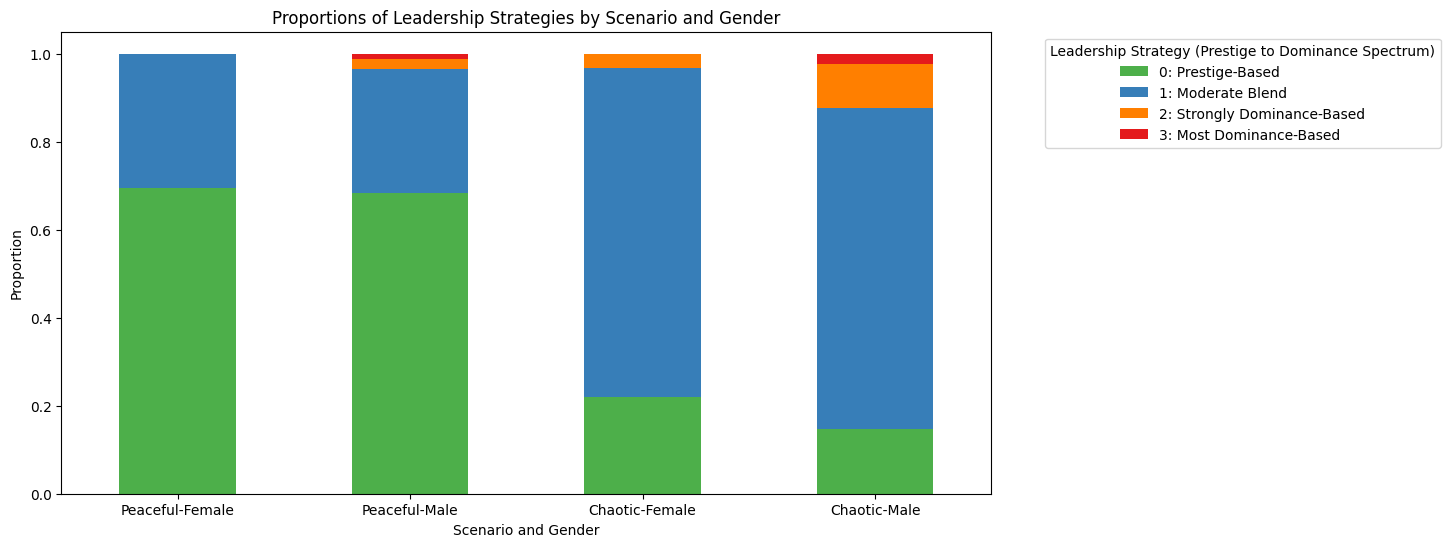

In [12]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from mord import LogisticAT
import matplotlib.pyplot as plt
import seaborn as sns

# Encode Scenario (Chaotic=1, Peaceful=0)
def encode_q22(description):
    if isinstance(description, str):
        desc_lower = description.lower()
        if 'chaos' in desc_lower or 'earthquake' in desc_lower:
            return 1
        elif 'calm' in desc_lower or 'well-organized' in desc_lower:
            return 0
    return None

data['Scenario_Binary'] = data['q22_do'].apply(encode_q22)

# Map q23 to numeric values (Prestige to Dominance)
strategy_mapping = {
    "Earning admiration and influence through vision, ethical behavior, and exemplary conduct without resorting to force.": 0,
    "Combining cooperative behavior with assertive actions to build alliances and demonstrate superior skills, balancing force and mutual support.": 1,
    "Gaining influence by outcompeting others while occasionally using forceful tactics to maintain control.": 2,
    "Using threats, intimidation, and force to assert power and influence over others.": 3
}
data['Strategy_Numeric'] = data['q23'].map(strategy_mapping)

# Encode gender (Female=0, Male=1)
gender_encoding = {'Female': 0, 'Male': 1}
data['Gender_Encoded'] = data['q7'].map(gender_encoding)

# Encode income as ordinal
income_mapping = {
    'Less than £30,000': 1,
    '£30,000 to £60,000': 2,
    '£60,001 to £90,000': 3,
    '£90,001 to £120,000': 4,
    'More than £120,000': 5
}
data['Income_Numeric'] = data['q5'].map(income_mapping)

# Encode education as ordinal
education_mapping = {
    'GCSEs or equivalent': 1,
    'A-Levels or equivalent': 2,
    'Undergraduate Degree': 3,
    'Postgraduate Degree': 4
}
data['Education_Numeric'] = data['q35'].map(education_mapping)

# Convert Age to numeric
data['Age'] = pd.to_numeric(data['age'], errors='coerce')

# Define columns for the regression (without interaction term)
regression_columns = [
    'Gender_Encoded',
    'Age',
    'Income_Numeric',
    'Education_Numeric',
    'Scenario_Binary'
]

# Ensure columns are numeric
for col in regression_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Ensure Strategy_Numeric is integer
data['Strategy_Numeric'] = pd.to_numeric(
    data['Strategy_Numeric'],
    downcast='integer',
    errors='coerce'
)

# Drop NaNs from relevant columns
data_clean = data.dropna(subset=regression_columns + ['Strategy_Numeric'])

# Prepare X and y
X = data_clean[regression_columns]
y = data_clean['Strategy_Numeric'].astype(int)

# Fit the cumulative link model
clm_model = LogisticAT(alpha=1.0)
clm_model.fit(X, y)

# Display coefficients
print("\nCLM Coefficients")
print(pd.DataFrame({'Coefficient': clm_model.coef_}, index=regression_columns))

# Bootstrapping p-values
def bootstrap_p_values(model, X_data, y_data, n_iterations=1000):
    coefs = []
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X_data, y_data)
        model.fit(X_resampled, y_resampled)
        coefs.append(model.coef_)
    coefs = np.array(coefs)
    p_values = [
        2 * np.min([
            np.mean(coefs[:, i] > 0),
            np.mean(coefs[:, i] < 0)
        ])
        for i in range(coefs.shape[1])
    ]
    return np.array(p_values)

clm_p_values = bootstrap_p_values(clm_model, X, y)
print("\nBootstrapped P-values for CLM")
print(pd.DataFrame({'P-value': clm_p_values}, index=regression_columns))

# Stacked bar chart (Prestige to Dominance)
strategy_proportions = (
    data_clean
    .groupby(['Scenario_Binary', 'Gender_Encoded'])['Strategy_Numeric']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(12, 6))
color_list = ['#4daf4a', '#377eb8', '#ff7f00', '#e41a1c']
strategy_proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)
ax.set_title('Proportions of Leadership Strategies by Scenario and Gender')
ax.set_xlabel('Scenario and Gender')
ax.set_ylabel('Proportion')
ax.set_xticklabels(['Peaceful-Female', 'Peaceful-Male', 'Chaotic-Female', 'Chaotic-Male'], rotation=0)

# Legend indicating Prestige → Dominance
strategy_labels = [
    '0: Prestige-Based',
    '1: Moderate Blend',
    '2: Strongly Dominance-Based',
    '3: Most Dominance-Based'
]
ax.legend(
    labels=strategy_labels,
    title='Leadership Strategy (Prestige to Dominance Spectrum)',
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

plt.savefig('leadership_strategies_stacked_bar.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
import scipy.stats as stats
import numpy as np

def calculate_sample_size_cohens_f2(alpha, power, r_squared, num_predictors):
    # Calculate Cohen's f^2
    f_squared = r_squared / (1 - r_squared)
    
    # Find Z values for alpha and power
    Z_alpha_over_2 = stats.norm.ppf(1 - alpha / 2)  # Two-tailed test
    Z_beta = stats.norm.ppf(power)  # Desired power
    
    # Calculate the required sample size using the formula
    required_sample_size = ((Z_alpha_over_2 + Z_beta) ** 2 * (1 + f_squared)) / f_squared + num_predictors + 1
    
    return np.ceil(required_sample_size)

# Parameters for power analysis
alpha = 0.05  # Significance level
power = 0.80  # Desired power level

# 1. Robust Regression Model (Combined Rating)
num_predictors_robust = 9  # Number of predictors in the robust model, including interactions
r_squared_robust = 0.10  # Estimated R^2 for robust regression model
sample_size_robust = calculate_sample_size_cohens_f2(alpha, power, r_squared_robust, num_predictors_robust)
print(f"Required Sample Size for Robust Regression (Combined Rating): {sample_size_robust}")

# 2. Ordinal Logistic Regression (CLM) Models (Attractiveness)
num_predictors_clm_attractiveness = 8  # Number of predictors in each attractiveness CLM
pseudo_r_squared_clm_attractiveness = 0.05  # Estimated pseudo-R^2 for the CLM
sample_size_clm_attractiveness_male = calculate_sample_size_cohens_f2(alpha, power, pseudo_r_squared_clm_attractiveness, num_predictors_clm_attractiveness)
sample_size_clm_attractiveness_female = calculate_sample_size_cohens_f2(alpha, power, pseudo_r_squared_clm_attractiveness, num_predictors_clm_attractiveness)
print(f"Required Sample Size for CLM (Attractiveness - Male): {sample_size_clm_attractiveness_male}")
print(f"Required Sample Size for CLM (Attractiveness - Female): {sample_size_clm_attractiveness_female}")

# 3. Ordinal Logistic Regression (CLM) Model (Scenario)
num_predictors_clm_scenario = 5  # Number of predictors in the scenario CLM model
pseudo_r_squared_clm_scenario = 0.08  # Estimated pseudo-R^2 for the CLM
sample_size_clm_scenario = calculate_sample_size_cohens_f2(alpha, power, pseudo_r_squared_clm_scenario, num_predictors_clm_scenario)
print(f"Required Sample Size for CLM (Scenario): {sample_size_clm_scenario}")

Required Sample Size for Robust Regression (Combined Rating): 89.0
Required Sample Size for CLM (Attractiveness - Male): 166.0
Required Sample Size for CLM (Attractiveness - Female): 166.0
Required Sample Size for CLM (Scenario): 105.0
